Create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Plot:

The temperature
The mean temperature each day
The mean temperature for each month
60% of the marks will be given for the above

For the last 40%

Plot:

The Windspeed (there is data missing from this column)
The rolling windspeed (say over 24 hours)
The max windspeed for each day
The monthly mean of the daily max windspeeds (yer I am being nasty here)
You do not need to over comment your code. Marks will be given for how nice the plots are.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

Use `read.csv` to import the data. Checking the data on this link shows the actual data dopes not start at row 1 so `header=20` is added to the `read_csv()` to tell pandas where to find the data.

In [31]:
url="https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

df = pd.read_csv(url, header=20)
print(df.head())

                date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0  10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1  31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
2  31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
3  31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
4  31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

   ... ind.3  wdsp ind.4  wddir  ww   w  sun    vis clht clamt  
0  ...     0     0     0      0  25  81  0.0  35000   32     5  
1  ...     0     0     0      0  25  82  0.0  40000   45     5  
2  ...     0     0     0      0  80  81  0.0   8000   32     7  
3  ...     0     0     0      0  25  82  0.0  28000   35     6  
4  ...     0     0     0      0   2  11  0.0  40000   40     6  

[5 rows x 21 columns]


C:\Users\kirst\AppData\Local\Temp\ipykernel_25692\1692416502.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, header=20)


In [35]:
df['date'] = df['date'].astype(str)
df['date_only'] = df['date'].str.split(' ').str[0]
df['time'] = df['date'].str.split(' ').str[1]
df['date_only'] = pd.to_datetime(df['date_only'])
print(df.head(3))

C:\Users\kirst\AppData\Local\Temp\ipykernel_25692\2799854883.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_only'] = pd.to_datetime(df['date_only'])


                date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0  10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1  31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
2  31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   

   ... ind.4  wddir  ww   w  sun    vis clht  clamt  date_only   time  
0  ...     0      0  25  81  0.0  35000   32      5 1996-04-10  14:00  
1  ...     0      0  25  82  0.0  40000   45      5 1996-07-31  08:00  
2  ...     0      0  80  81  0.0   8000   32      7 1996-07-31  09:00  

[3 rows x 23 columns]


## Plotting the data
### Plot of the temperature

In [5]:
print(df.columns)

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt', 'date_only', 'time'],
      dtype='object')


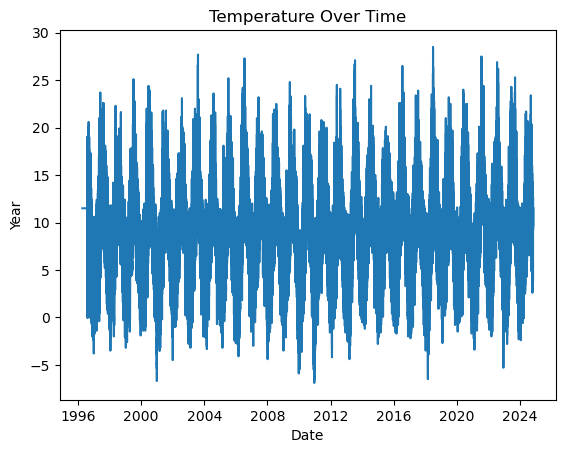

In [36]:
import matplotlib.pyplot as plt

plt.plot(df['date_only'], df['temp'], label ='Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Year')
plt.show()

### The mean temperature each day
To plot by the mean temperature each day we can use the `groupby` command in pandas.


In [7]:
daily_mean_temp = df.groupby('date_only')['temp'].mean()

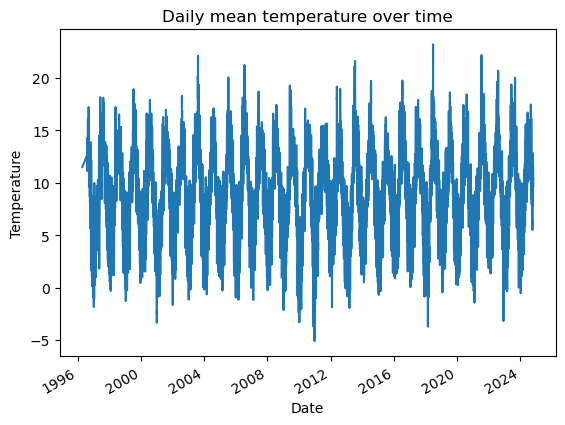

In [37]:
import matplotlib.pyplot as plt

daily_mean_temp.plot(kind='line')
plt.title('Daily mean temperature over time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

### The mean temperature for each month

To do this we slightly modify the code above to extract the year and month from the date_only column.

In [39]:
df['year_month'] = df['date_only'].dt.to_period('M')

Group by 'year_month' and calculate the mean temperature

In [40]:
monthly_mean_temp = df.groupby('year_month')['temp'].mean()

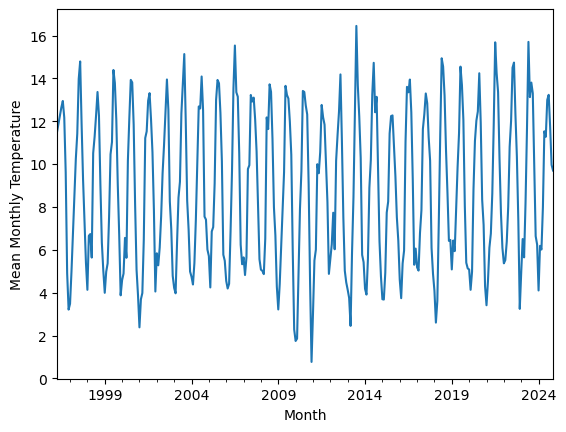

In [41]:
monthly_mean_temp.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Mean Monthly Temperature')
plt.show()

## The mean temperature for each month
The Windspeed (there is data missing from this column)
The rolling windspeed (say over 24 hours)
### The max windspeed for each day

The monthly mean of the daily max windspeeds (yer I am being nasty here)

### The max windspeed for each day
There is some missing data from the windspeed column, to drop this data use `dropna()`. To keep things clean I am 

In [44]:
df.dropna()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wddir,ww,w,sun,vis,clht,clamt,date_only,time,year_month
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,25,81,0.0,35000,32,5,1996-04-10,14:00,1996-04
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,25,82,0.0,40000,45,5,1996-07-31,08:00,1996-07
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,80,81,0.0,8000,32,7,1996-07-31,09:00,1996-07
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,25,82,0.0,28000,35,6,1996-07-31,10:00,1996-07
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,2,11,0.0,40000,40,6,1996-07-31,11:00,1996-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247669,31-oct-2024 20:00,0,0.2,0,10.1,0,10.1,10.1,12.4,100,...,220,,,0.0,,0,8,2024-10-31,20:00,2024-10
247670,31-oct-2024 21:00,0,0.1,0,10.1,0,10.1,10.0,12.4,100,...,230,,,0.0,,0,8,2024-10-31,21:00,2024-10
247671,31-oct-2024 22:00,0,0.0,0,10.0,0,10.0,10.0,12.3,100,...,210,,,0.0,,0,8,2024-10-31,22:00,2024-10
247672,31-oct-2024 23:00,0,0.1,0,9.8,0,9.8,9.8,12.1,100,...,200,,,0.0,,0,8,2024-10-31,23:00,2024-10


In [45]:
daily_max_wind = df.groupby('date_only')['wedsp'].mean()

print(df.info())

KeyError: 'Column not found: wedsp'